# CODING SAMURAI INTERNSHIP

# TASK: 1 

## Exploratory Data Analysis (EDA) on Airbnb Listings

In [178]:
import pandas as pd
import numpy as np

In [179]:
df = pd.read_csv("listings.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,...,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,...,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,...,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spect

In [180]:
df.info()

#with this we can get the information about the dataset like what type of data type are there
#or how many non-null values are there w.r.t their columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [181]:
df.isnull().sum().head(50)

#we are calculating number of null values that are present in the first 50 columns

id                                 0
listing_url                        0
scrape_id                          0
last_scraped                       0
name                               0
summary                          177
space                            569
description                        0
experiences_offered                0
neighborhood_overview           1032
notes                           1606
transit                          934
thumbnail_url                    320
medium_url                       320
picture_url                        0
xl_picture_url                   320
host_id                            0
host_url                           0
host_name                          2
host_since                         2
host_location                      8
host_about                       859
host_response_time               523
host_response_rate               523
host_acceptance_rate             773
host_is_superhost                  2
host_thumbnail_url                 2
h

In [182]:
df.isnull().sum().tail(43)
#we are calculated(i.e. summing) null values in last 43 columns

room_type                              0
accommodates                           0
bathrooms                             16
bedrooms                               6
beds                                   1
bed_type                               0
amenities                              0
square_feet                         3721
price                                  0
weekly_price                        1809
monthly_price                       2301
security_deposit                    1952
cleaning_fee                        1030
guests_included                        0
extra_people                           0
minimum_nights                         0
maximum_nights                         0
calendar_updated                       0
has_availability                       0
availability_30                        0
availability_60                        0
availability_90                        0
availability_365                       0
calendar_last_scraped                  0
number_of_review

In [183]:
df = df.drop(df[['license','square_feet']],axis = 1)
#we are dropping these columns because there are too many null values we can't replace it

In [234]:
# Get the column names with numeric values as a list
numeric_column_names = df.select_dtypes(include=['number']).columns.tolist()
print(numeric_column_names)

['id', 'scrape_id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month']


In [186]:
#we can replace the numeric columns null values with their mean

df[['id',
 'scrape_id',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'reviews_per_month']] = df[['id',
 'scrape_id',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'reviews_per_month']].fillna(df[['id',
 'scrape_id',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'reviews_per_month']].mean())

In [223]:
#checking again now how many Null values are left

df.isna().sum().head(50)

id                              0
listing_url                     0
scrape_id                       0
last_scraped                    0
name                            0
summary                         0
space                           0
description                     0
experiences_offered             0
neighborhood_overview           0
notes                           0
transit                         0
thumbnail_url                   0
medium_url                      0
picture_url                     0
xl_picture_url                  0
host_id                         0
host_url                        0
host_name                       0
host_since                      0
host_location                   0
host_about                      0
host_response_time              0
host_response_rate              0
host_acceptance_rate            0
host_is_superhost               0
host_thumbnail_url              0
host_picture_url                0
host_neighbourhood              0
host_listings_

In [187]:
#checking for null values

df.isna().sum().tail(41)

room_type                              0
accommodates                           0
bathrooms                              0
bedrooms                               0
beds                                   0
bed_type                               0
amenities                              0
price                                  0
weekly_price                        1809
monthly_price                       2301
security_deposit                    1952
cleaning_fee                        1030
guests_included                        0
extra_people                           0
minimum_nights                         0
maximum_nights                         0
calendar_updated                       0
has_availability                       0
availability_30                        0
availability_60                        0
availability_90                        0
availability_365                       0
calendar_last_scraped                  0
number_of_reviews                      0
first_review    

In [188]:
#now creating a fuction to convert object data type (such as $10) into a numeric data type

def convert_price(column):
    # Remove non-numeric characters ('$' and ',') and convert to float
     return pd.to_numeric(column.astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')

In [189]:
toConvert = df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']]
for column_name in toConvert:
    df[column_name] = convert_price(df[column_name])

In [190]:
df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             3818 non-null   float64
 1   weekly_price      2009 non-null   float64
 2   monthly_price     1517 non-null   float64
 3   security_deposit  1866 non-null   float64
 4   cleaning_fee      2788 non-null   float64
 5   extra_people      3818 non-null   float64
dtypes: float64(6)
memory usage: 179.1 KB


In [191]:
#removing Null values from the newly converted columns

df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']] = df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']].fillna(df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']].mean())

In [192]:
df.shape

(3818, 90)

In [193]:
#replacing the missing value with the mode because it contained categorical string

most_frequent_neighborhood = df['neighbourhood'].mode()[0]
df['neighbourhood'].fillna(most_frequent_neighborhood, inplace=True)

In [194]:
#replacing every other missing value with 0

df = df.fillna(0)

In [195]:
print(df.isnull().sum())

id                                  0
listing_url                         0
scrape_id                           0
last_scraped                        0
name                                0
                                   ..
cancellation_policy                 0
require_guest_profile_picture       0
require_guest_phone_verification    0
calculated_host_listings_count      0
reviews_per_month                   0
Length: 90, dtype: int64


Now there is no null value left

In [196]:
import sklearn as skl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Visualizing Attributes

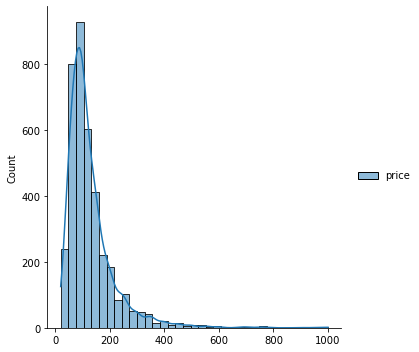

In [197]:
#creating a distribution graph of Price


sns.displot(df[['price']].dropna(), kde=True, bins=35)

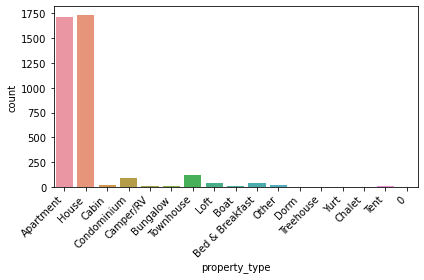

In [198]:
#creating a countplot for Property type
# House type property are much famous than the other type


sns.countplot(x='property_type', data=df)
plt.xticks(rotation=45, ha='right')  # Rotate and align labels to the right
plt.tight_layout()  # Helps with spacing

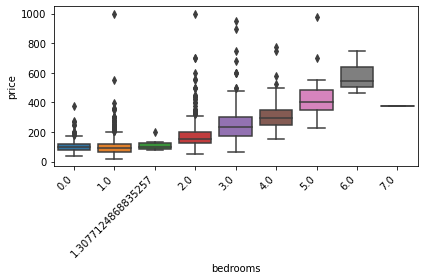

In [200]:
#  Box Plot (Numeric Data)
sns.boxplot(x='bedrooms', y='price', data=df)
plt.xticks(rotation=45, ha='right')  # Rotate and align labels to the right
plt.tight_layout()  # Helps with spacing

Increase in number of Bedroom means Increase in Price according to this graph

<AxesSubplot:title={'center':'Bed Type Distribution'}>

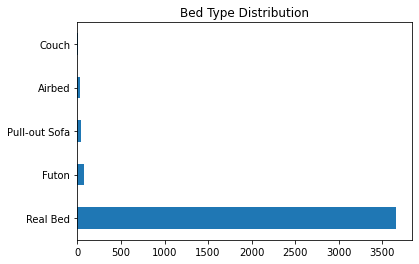

In [202]:
#Bed type distribution
#the Real bed is in demand



# Specify the categories you want to include
categories = ['Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed']

# Filter the DataFrame
filtered_df = df[df['bed_type'].isin(categories)]

# Count the occurrences of each category
category_counts = filtered_df['bed_type'].value_counts()

# Create a horizontal bar chart
category_counts.plot(kind='barh', title='Bed Type Distribution')

according to this graph the Real bed is in demand

<AxesSubplot:xlabel='instant_bookable', ylabel='count'>

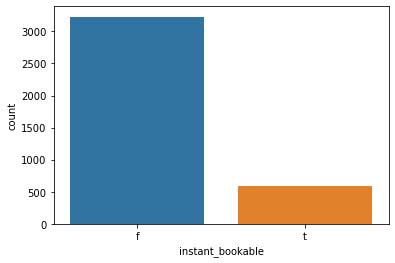

In [225]:

sns.countplot(x='instant_bookable', data=df)

according to this graph there is very low chances for instant booking

<AxesSubplot:xlabel='cancellation_policy', ylabel='count'>

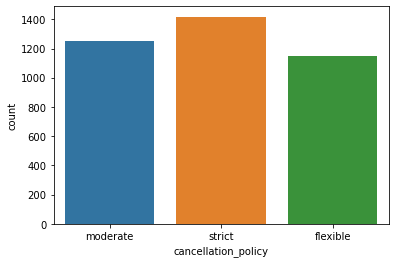

In [230]:
sns.countplot(x='cancellation_policy', data=df)

according to this graph there is a strict cancelatioin policy

# Statistical Analysis

In [204]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,127.976166,788.481832,2613.336190,287.610397,61.710904,1.672603,10.667627,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.620648,28.620648,0.043052,0.031745,1.977599,0.589130,0.882700,1.139330,90.250022,386.117854,1085.398578,188.886166,41.725079,1.311040,17.585922,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.020223,0.635022,0.725880,0.541745,0.517493,0.572542,0.682751,5.893029,1.665964
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,20.000000,100.000000,500.000000,95.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,75.000000,620.000000,2603.334047,250.000000,35.000000,1.000000,0.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,94.000000,9.636392,9.000000,9.786709,9.809599,9.000000,9.000000,1.000000,0.830000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,100.000000,788.481832,2613.336190,287.610397,61.710904,1.000000,0.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.452245,1.000000,2.000000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,150.000000,788.481832,2613.336190,287.610397,65.000000,2.000000,20.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.660000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,1000.000000,6300.000000,19500.000000,5000.000000,300.000000,15.000000,300.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,37.000000,12.150000


# Which Property has Maximum Demands?

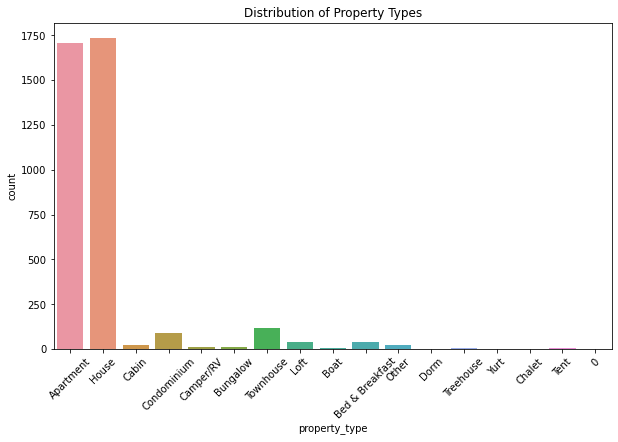

In [207]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='property_type')
plt.title('Distribution of Property Types')
plt.xticks(rotation=45)
plt.show()

according to this graph Houses are more popular

# Which Neighbourhood is more popular?

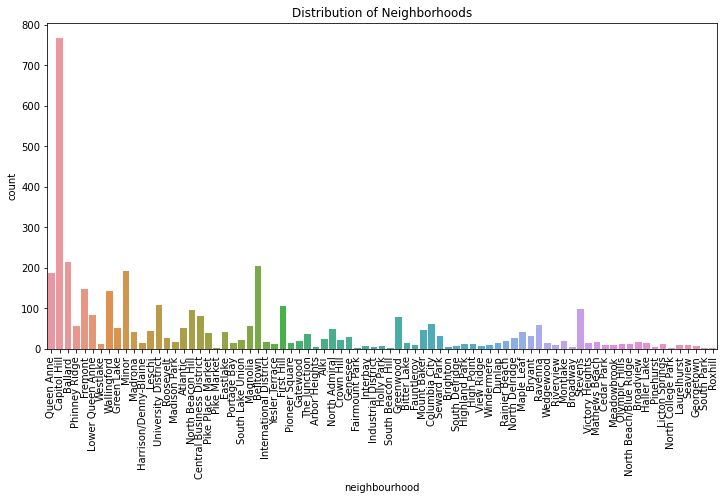

In [208]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='neighbourhood')
plt.title('Distribution of Neighborhoods')
plt.xticks(rotation=90)
plt.show()

capitol Hill is the most famous neighbourhood according to this graph.

# Finding the Most Correlated Attributes

In [209]:
relevant_columns = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'price', 'security_deposit', 'review_scores_rating'
]
df_subset = df[relevant_columns]


In [210]:
correlation_matrix = df_subset.corr()
correlation_matrix

,accommodates,bathrooms,bedrooms,beds,price,security_deposit,review_scores_rating
accommodates,1.000000,0.537918,0.770594,0.861107,0.652218,0.224116,-0.012023
bathrooms,0.537918,1.000000,0.610570,0.532199,0.516017,0.227009,0.041281
bedrooms,0.770594,0.610570,1.000000,0.752944,0.627596,0.264320,0.020972
beds,0.861107,0.532199,0.752944,1.000000,0.589306,0.231018,-0.000665
price,0.652218,0.516017,0.627596,0.589306,1.000000,0.294389,0.050488
security_deposit,0.224116,0.227009,0.264320,0.231018,0.294389,1.000000,0.030096
review_scores_rating,-0.012023,0.041281,0.020972,-0.000665,0.050488,0.030096,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

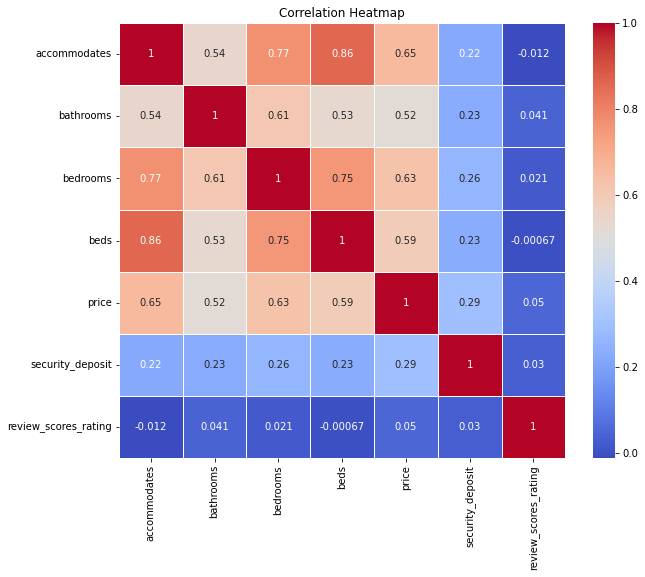

In [211]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

according to this correlation analysis the highly correlated columns/attributes are:
first beds with accommodates with 0.86 correlation
second bedrooms with accomodates with 0.77 correlation
third bedrooms with beds with 0.75 correlation

## FInding the Relation of Price W.R.T. Accommodates,Bathrooms and Bedrooms:

Text(0.5, 1.0, 'Scatter Plot of Price vs. Accommodates')

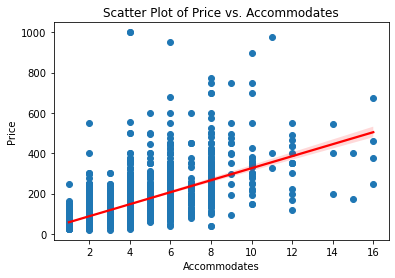

In [222]:
import matplotlib.pyplot as plt

plt.scatter(df['accommodates'], df['price'])
sns.regplot(x='accommodates', y='price', data=df, scatter=False, color='red')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Accommodates')


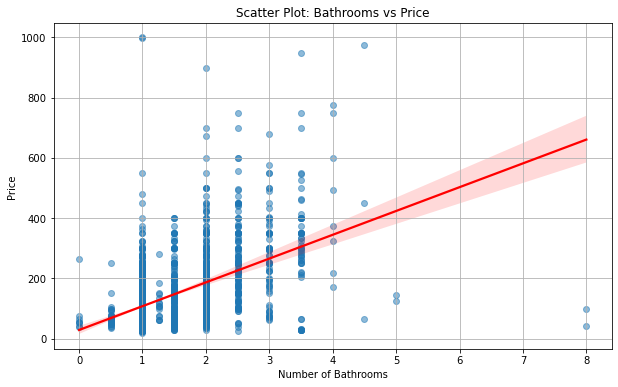

In [219]:
# Scatter plot for bathrooms vs price
plt.figure(figsize=(10, 6))
plt.scatter(df['bathrooms'], df['price'], alpha=0.5)
sns.regplot(x='bathrooms', y='price', data=df, scatter=False, color='red')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Scatter Plot: Bathrooms vs Price')
plt.grid(True)

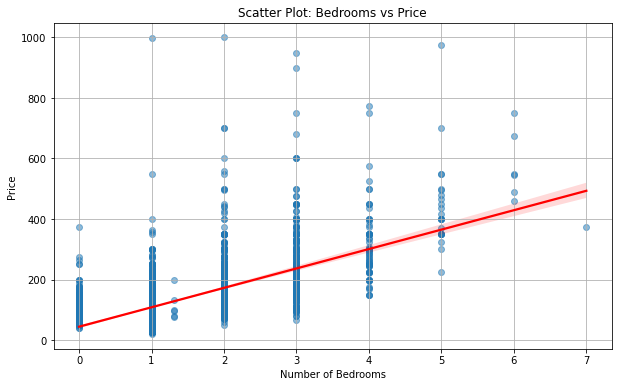

In [220]:
# Scatter plot for bedrooms vs price
plt.figure(figsize=(10, 6))
plt.scatter(df['bedrooms'], df['price'], alpha=0.5)
sns.regplot(x='bedrooms', y='price', data=df, scatter=False, color='red')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Scatter Plot: Bedrooms vs Price')
plt.grid(True)

scatter plot distribution with linear regression : bathroom with price shows more positive report